In [1]:
%config IPCompleter.greedy = True

## Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [5]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
diabetes_data_copy = diabetes_data.copy()

In [15]:
# Replacing the value 0 with NaN as Gluocse, BloodPressure and some other fileds of a person cannot be 0
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [16]:
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

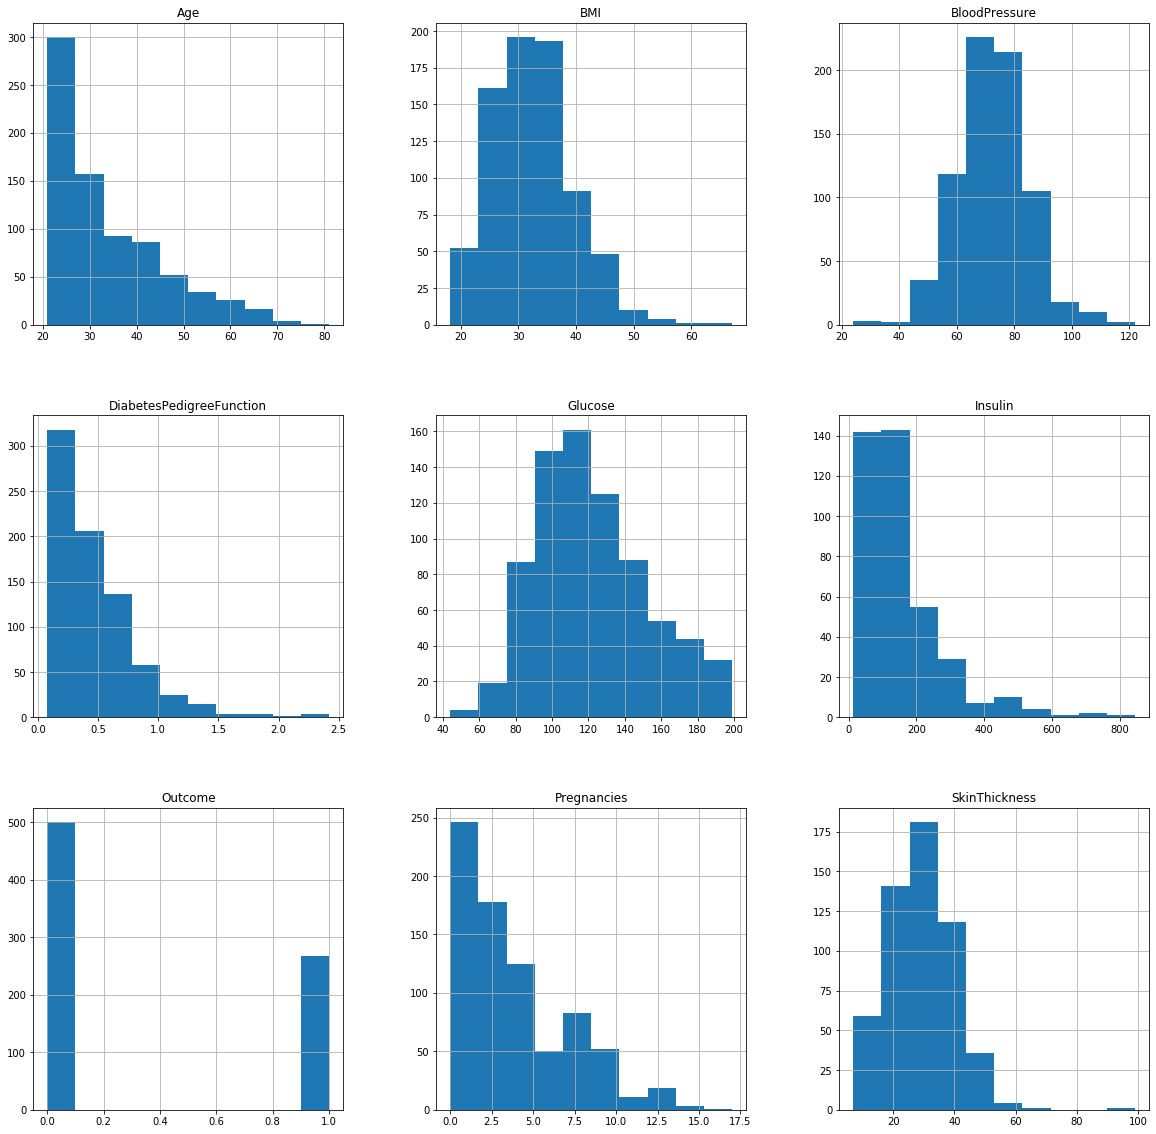

In [17]:
h = diabetes_data_copy.hist(figsize = (20,20))

## Performing imputation based on the data distribution

In [19]:
diabetes_data_copy.Glucose.fillna(diabetes_data_copy.Glucose.mean(), inplace = True)
diabetes_data_copy.BloodPressure.fillna(diabetes_data_copy.BloodPressure.mean(), inplace = True)
diabetes_data_copy.SkinThickness.fillna(diabetes_data_copy.SkinThickness.median(), inplace = True)
diabetes_data_copy.Insulin.fillna(diabetes_data_copy.BloodPressure.median(), inplace = True)
diabetes_data_copy.BMI.fillna(diabetes_data_copy.BMI.median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

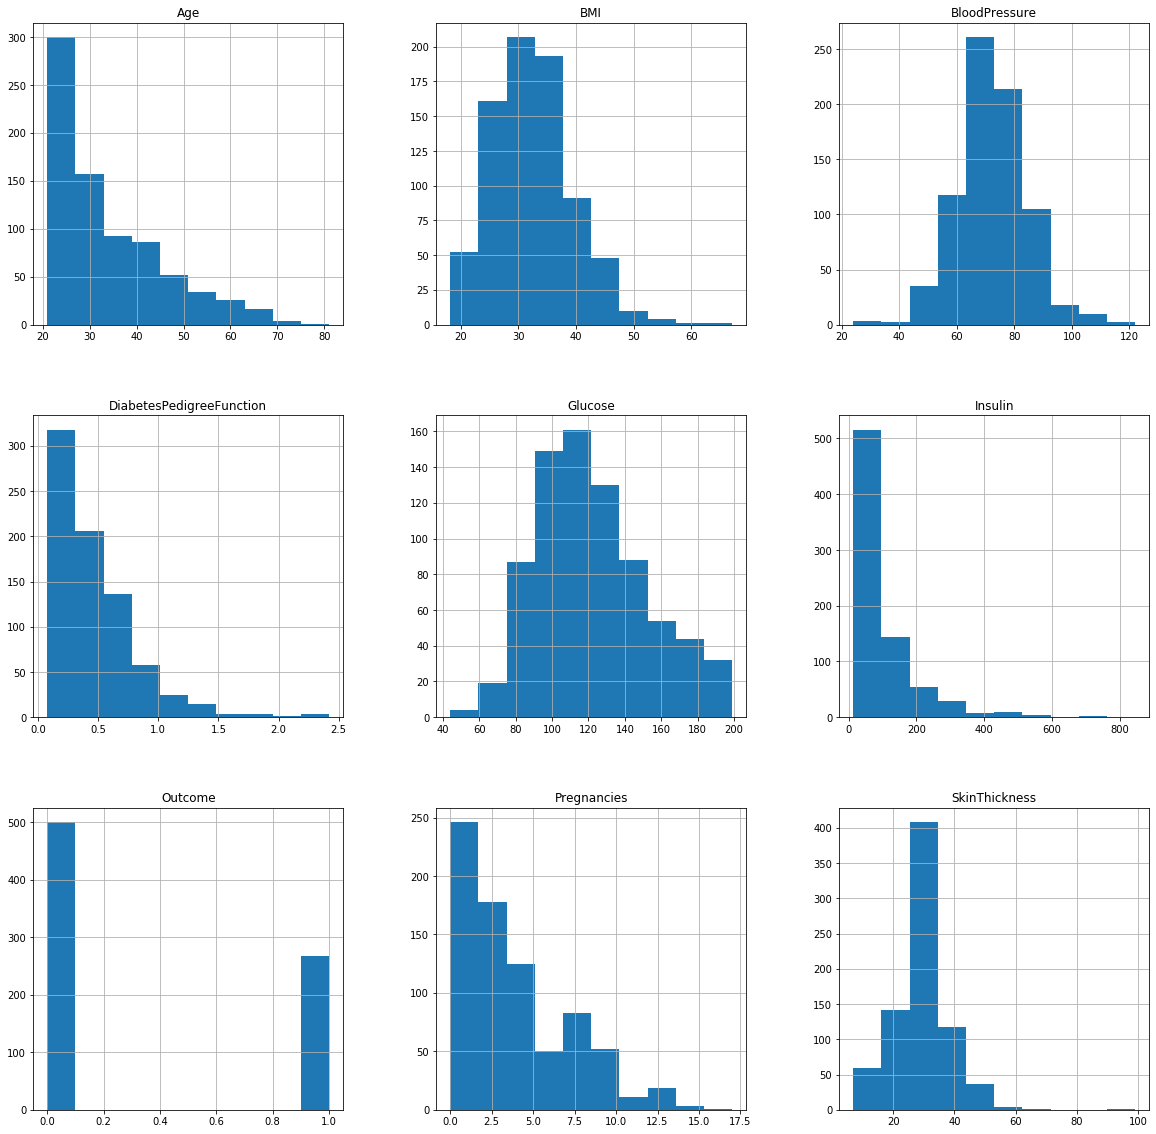

In [20]:
h = diabetes_data_copy.hist(figsize = (20,20))

In [21]:
diabetes_data_copy.shape

(768, 9)

## Checking if data is imbalanced

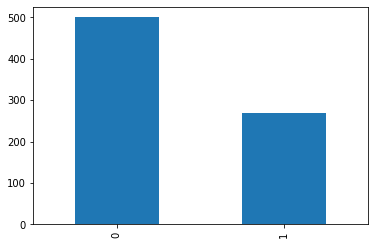

In [25]:
diabetes_data_copy.Outcome.value_counts().plot(kind="bar")

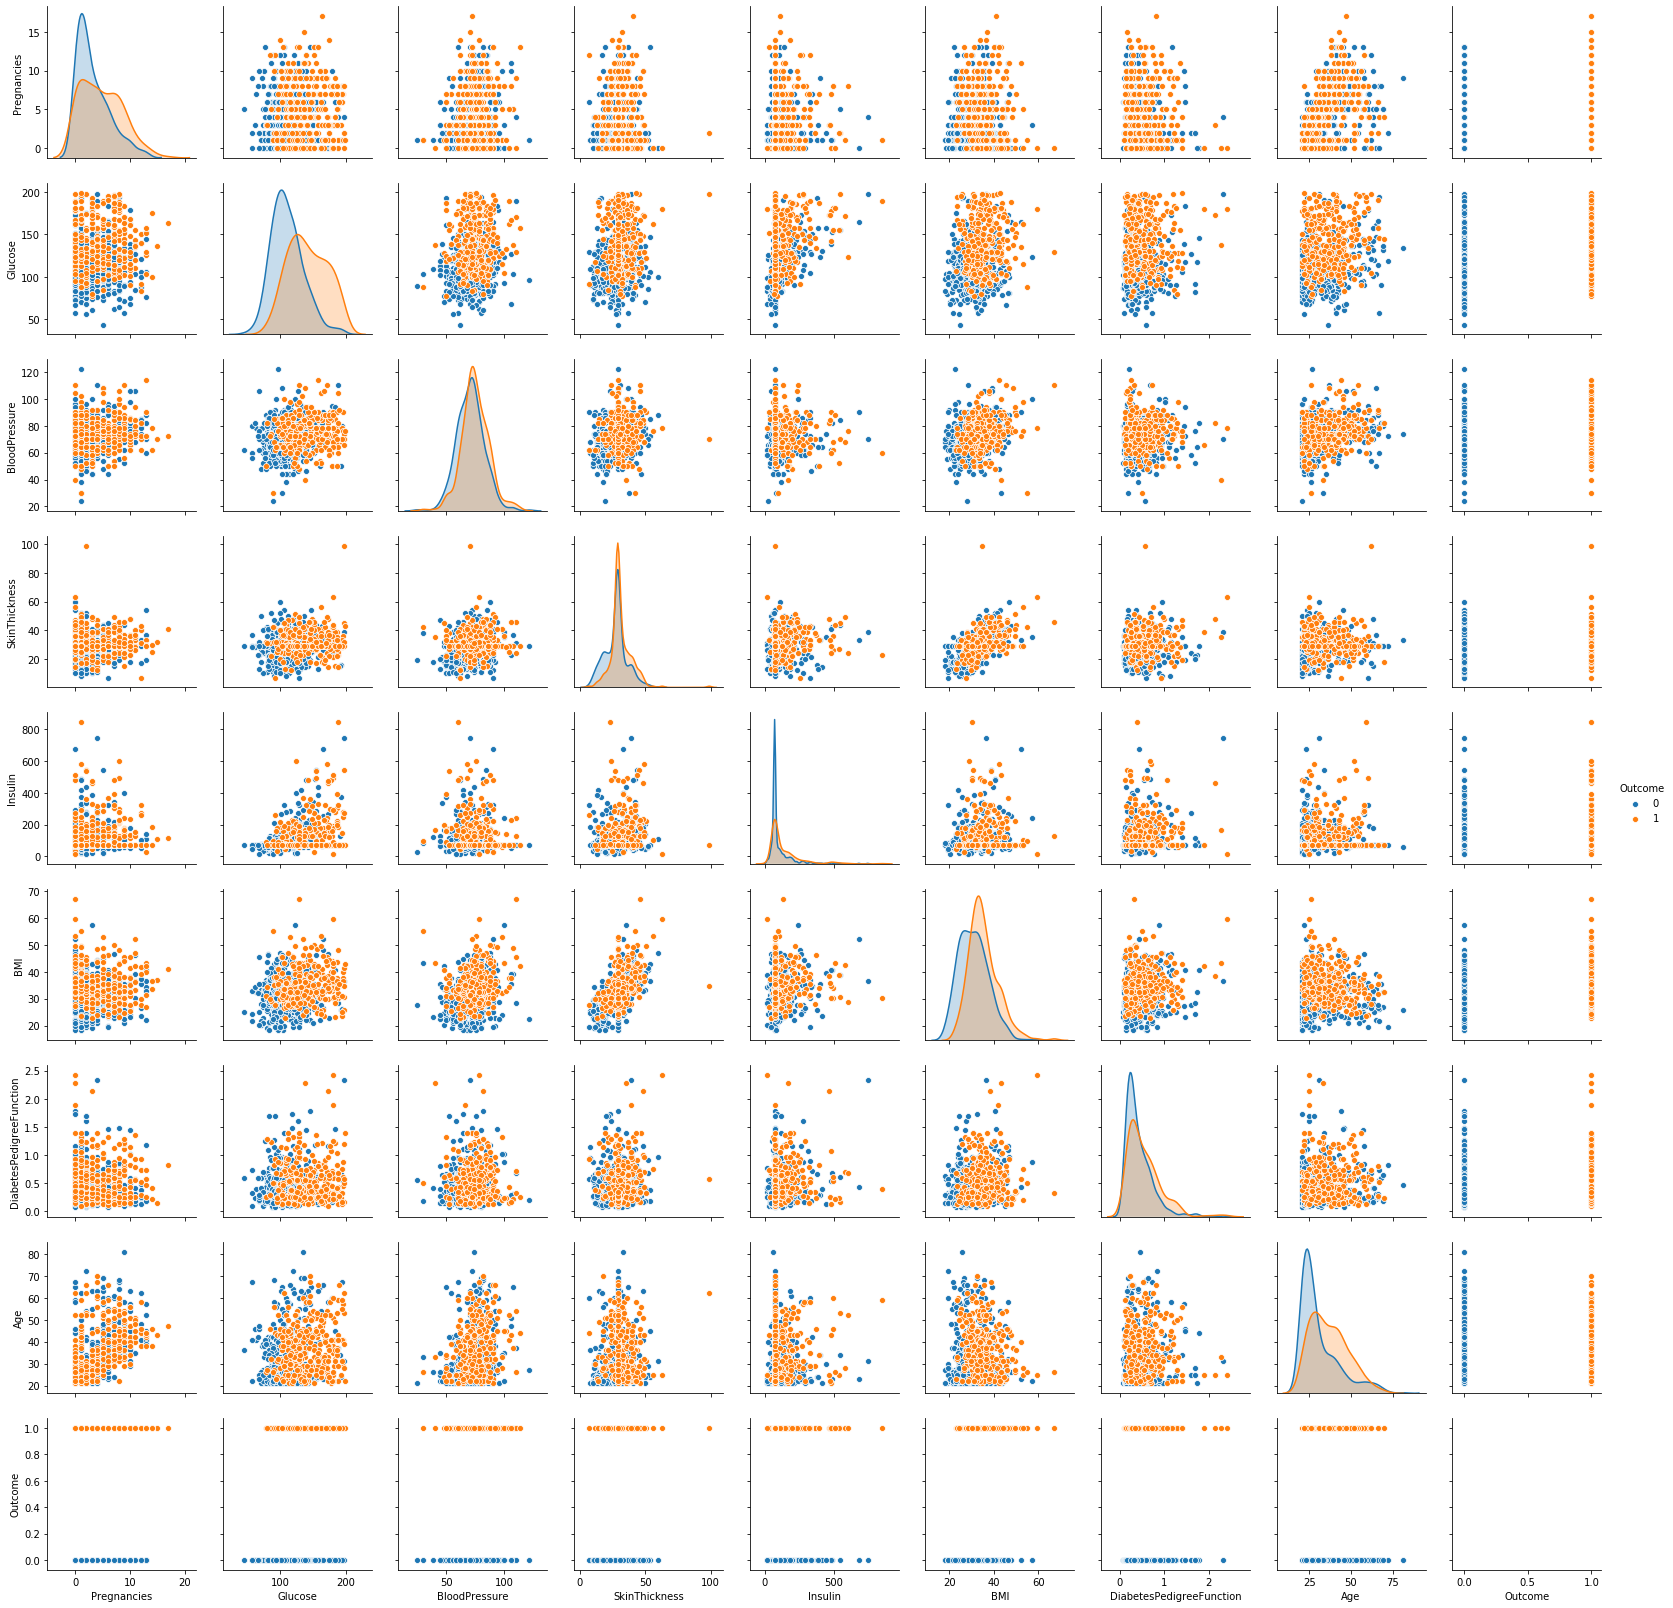

In [26]:
sns.pairplot(diabetes_data_copy, hue = 'Outcome')

## Checking the correlation between features

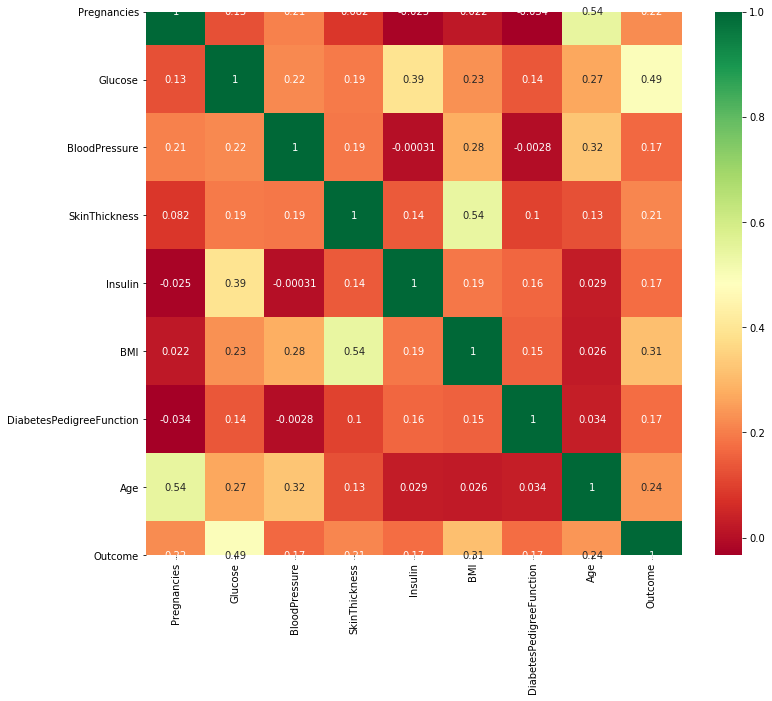

In [32]:
plt.figure(figsize=(12,10))
s = sns.heatmap(diabetes_data_copy.corr(), annot=True, cmap ='RdYlGn')

## Standardizing features by removing the mean and scaling to unit variance

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(diabetes_data_copy.drop('Outcome', axis = 1)), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.451850,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.451850,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.451850,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.221504,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.560499,1.549303,5.484909,-0.020496


In [37]:
y = diabetes_data_copy['Outcome']

## Creating train and test data

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3,random_state=42, stratify=y)

## Classifying data using K-NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [49]:
print(train_scores)
print(test_scores)

[1.0, 0.84765625, 0.875, 0.814453125, 0.83203125, 0.80078125, 0.806640625, 0.791015625, 0.794921875, 0.796875, 0.794921875, 0.787109375, 0.794921875, 0.78515625]
[0.75390625, 0.73828125, 0.75, 0.734375, 0.73828125, 0.73828125, 0.73046875, 0.75, 0.7734375, 0.75390625, 0.78125, 0.734375, 0.75, 0.74609375]


In [50]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [51]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.125 % and k = [11]


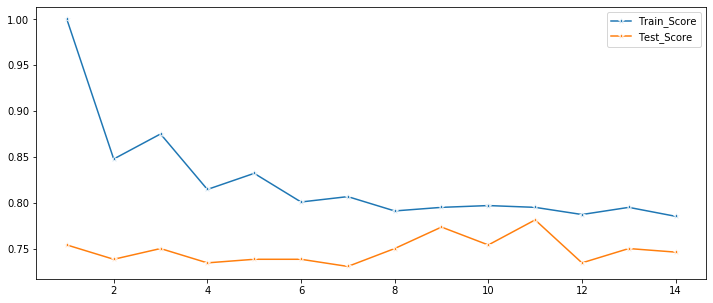

In [52]:
plt.figure(figsize=(12,5))
a = sns.lineplot(range(1,15), train_scores, marker='*',label='Train_Score')
a = sns.lineplot(range(1,15), test_scores, marker='*',label='Test_Score')

In [54]:
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.78125

# Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,34,55,89
All,179,77,256


Text(0.5, 15.0, 'Predicted label')

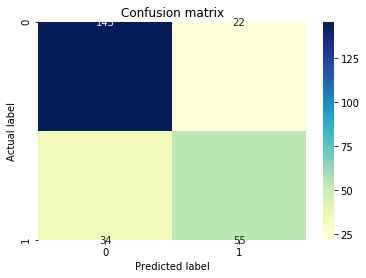

In [58]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.71      0.62      0.66        89

    accuracy                           0.78       256
   macro avg       0.76      0.74      0.75       256
weighted avg       0.78      0.78      0.78       256



## ROC curve

In [66]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
y_pred_proba

array([0.        , 0.72727273, 0.45454545, 0.09090909, 0.45454545,
       0.27272727, 0.63636364, 0.81818182, 0.        , 0.18181818,
       0.54545455, 0.36363636, 0.54545455, 0.81818182, 0.63636364,
       0.81818182, 0.54545455, 0.        , 0.27272727, 0.72727273,
       0.09090909, 0.09090909, 0.18181818, 0.36363636, 0.09090909,
       0.36363636, 0.54545455, 0.18181818, 0.        , 0.09090909,
       0.45454545, 0.        , 0.18181818, 0.        , 0.        ,
       0.36363636, 0.18181818, 0.        , 0.        , 0.        ,
       0.27272727, 0.18181818, 0.27272727, 0.        , 1.        ,
       0.18181818, 0.27272727, 0.63636364, 0.72727273, 0.        ,
       0.45454545, 0.        , 0.09090909, 0.        , 0.63636364,
       0.63636364, 0.        , 0.72727273, 0.36363636, 0.63636364,
       0.09090909, 0.72727273, 0.09090909, 0.        , 0.        ,
       0.        , 0.36363636, 0.54545455, 0.45454545, 0.45454545,
       0.27272727, 0.18181818, 0.54545455, 0.81818182, 0.18181

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.         0.01197605 0.0239521  0.05389222 0.09580838
 0.13173653 0.20359281 0.28742515 0.39520958 0.52095808 0.69461078
 1.        ]
TPR
[0.         0.01123596 0.01123596 0.11235955 0.28089888 0.39325843
 0.61797753 0.71910112 0.78651685 0.87640449 0.93258427 0.97752809
 1.        ]
Thresholds
[2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


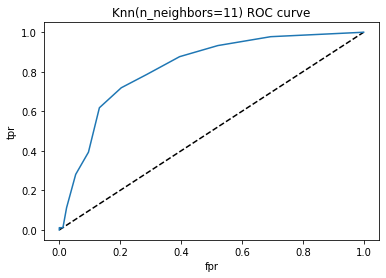

In [69]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [73]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8213684989571419